#8. 자연어 처리

1. 자연어 처리 기초
![](./na_02.png)
* 형태소 : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

문자를 숫자로 바꾸는 것이 자연어 처리의 기본이다.Word embeding, 간단히 말해서 텍스트를 숫자로 표현하는 것이다. 중요한 것은 같은 문자라고 하더라도 다른 수치로 표현할 수 있도 단어를 사전을 통해 매핑해서 벡터로 만드는 것이다. 예를 들면  Hi my name is NLP라는 문장이 있으면 [Hi,my,name,is,NLP]로 분류하고 OneHot Encoding을 통해 0또는 1로 나타낸다.

어휘사전 구축 후 새로운 문장이 들어왔을때 사전에 있는것과 매칭한다. AI, 함께, 하며의 3단어만 1로 변경되고 나머지는 0이다.

CountVectorizer : 각 문장에서 단어 출현 횟수를 카운팅하는 방법(BOW,Bag of Words)

**CountVectorizer는 sklearn의 feature extraction에서 제공하는 클래스로, 텍스트 데이터를 단어 level로 벡터화하는 작업을 수행합니다. 주로 문서 분류, 텍스트 분석 등에 사용됩니다. 이 클래스는 단어들의 count를 세고, 이를 이용해 각 문서를 벡터 형태로 변환합니다. 이 클래스는 다음과 같은 기능을 제공합니다.
단어 토큰화: 텍스트 데이터를 단어 단위로 자르는 작업을 수행합니다.
단어 빈도수 계산: 각 문서에 있는 각 단어의 빈도를 계산하여 카운트합니다.
인코딩: 단어들을 벡터 형태로 변환합니다.
예를 들어, ["I like NLP and I will study NLP"]라는 문장이 있을 때, CountVectorizer는 이를 다음과 같은 형태의 벡터로 변환합니다. [I, like, NLP, and, will, study] -> [1, 1, 2, 1, 1, 1] 위와 같이 단어의 빈도수를 측정하여 벡터로 변환합니다. 이렇게 벡터화된 데이터는 머신러닝 알고리즘의 입력값으로 사용될 수 있습니다.

**BOW(Bag of Words)는 문서 내의 단어들의 출현 빈도(frequency)를 수치화하여 벡터로 나타내는 방법입니다. 텍스트 처리의 기본적인 방법 중 하나로, 문서를 특정한 단위로 분할하여 단어의 출현 빈도를 계산합니다. 예를 들면, "I love Korea! Korea is beautiful country!" 라는 문장이 있다면, 문장 내 단어 "I", "love", "Korea", "is", "beautiful", "country" 등등과 같은 단어들을 뽑아내어 출현 빈도를 새로운 벡터로 표현합니다. 이렇게 만들어진 벡터는 각각의 단어들이 문서 내에서 얼마나 많이 출현하였는지를 나타내는 빈도수를 포함하며, 이를 바탕으로 문장이나 문서들 간 유사성을 계산할 수 있게 됩니다. BOW는 자연어 처리 분야에서 매우 중요한 전처리 기법 중 하나입니다.

TfidfVectorizer : TF-IDF 방법으로 단어의 가중치를 조정하는 방법, 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

**TfidfVectorizer는 문서의 주요 내용을 추출하는 자연어 처리 기술 중 하나입니다. TfidfVectorizer는 토큰화, 정규화, 빈도수 측정 등의 과정을 통해 문서에 대한 feature vector를 만들기 때문에, 문서 분석, 분류, 정보 검색과 같은 분야에서 많이 활용됩니다. TfidfVectorizer에서 "Tfidf"란 Term Frequency-Inverse Document Frequency의 약자로, 각 단어의 빈도수와 전체 문서에서의 빈도수에 따른 가중치를 반영하는 값입니다. 즉, 각 단어의 빈도수가 높을수록 해당 단어는 중요한 단어라는 것을 나타내는 반면, 전체 문서에서의 빈도수가 많을수록 해당 단어는 중요하지 않은 단어라는 것을 나타냅니다. 이를 기반으로, TfidfVectorizer는 각 문서에 대한 feature vector를 생성하는데, 각 feature(단어)들은 문서의 주요 내용을 나타내는 중요한 단어에 가중치를 더 부여하게 됩니다. TfidfVectorizer는 머신러닝 분류 모델의 feature로 사용되는 등, 다양한 분야에서 활용됩니다. 하지만, TfidfVectorizer는 단어 간의 순서를 고려하지 않기 때문에 순서에 따라 대화에서 의미는 달라질 수 있는 자연어 분야에는 적합하지 않을 수 있습니다.

## 자연어 처리

-NLP(Natural Language Processing) : 자연어 처리

-사람이 사용하는 언어를 처리하고 해석

## 자연어 처리 기초

### 형태소 분석기

-konlpy : 한국어 처리를 위한 형태소 분석기

-형태소 : 의미를 가지는 가장 작은 말의 단위

warnings.filterwarnings('ignore')는 프로그램에서 발생할 수 있는 경고 메시지를 무시하도록 하는 명령입니다. 이 명령을 사용하면 경고 메시지를 볼 필요 없이 오류 메시지만 볼 수 있기 때문에 코드의 디버깅이 쉬워집니다. 하지만 경고 메시지는 다양한 원인을 가지므로 프로그램에서 발생한 문제를 진단하거나 수정하는데 도움을 줍니다. 따라서, 경고 메시지가 의미 있는 정보를 가지고 있을 때는 filterwarnings을 사용하지 않는 것이 좋습니다.

In [51]:
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [52]:
#konlpy 설치
!pip install konlpy

In [53]:
#라이브러리 불러오기(okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [54]:
#토큰화(형태소 단위)
text = "함께 탐험하며 성장하는 AI학교 AIFFEL"
print(tokenizer.morphs(text))

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']


In [55]:
#토근화(명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [56]:
#토큰화(품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

In [57]:
#CountVectorizer : 각 문장에서 단어 출현 횟수를 카운팅하는 방법(BOW,Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


Morphs는 형태소 분석기에서 제공하는 기능 중 하나로, 입력된 문장에서 형태소 단위로 토큰화하여 출력해줍니다. 형태소란, 의미가 있는 가장 작은 말의 단위를 의미합니다. 예를 들어, "가볍게 달리는" 이라는 문장에서는 "가볍게", "달리는" 등의 형태소로 나뉘어집니다. Morphs 기능을 사용하면 이러한 형태소를 분석하여 문장을 적절한 단어로 토큰화할 수 있습니다. 이를 통해 문장을 더욱 자세하게 분석하고 이해할 수 있습니다.

In [58]:
# 단어 토큰화(Okt)
words = tokenizer.morphs(text)

In [59]:
# 데이터 학습 - 어휘사전 만들기
vect.fit(words)

CountVectorizer()

In [60]:
#학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [61]:
# 단어사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [62]:
# 단어사전 크기
len(vect.vocabulary_)

7

In [63]:
# 인코딩
df_t = vect.transform(words)

In [64]:
#인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [65]:
# 어휘와 피처(데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [66]:
# test - 새로운 변수가 들어왔을때
test = "AI와 공부하며 함께 성장해요"

In [67]:
# 토큰화
words_test = tokenizer.morphs(test)
words_test

['AI', '와', '공부', '하며', '함께', '성장해요']

In [68]:
# fit은 안해도 되고 transform만 해도 된다.
# 인코딩 된 데이터 Matrix
df_test = vect.transform(words_test)
df_test.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])

In [69]:
# 어휘와 피처(데이터 프레임)
pd.DataFrame(df_test.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0


In [70]:
#TfidfVectorizer : TF-IDF 방법으로 단어의 가중치를 조정하는 방법,
# 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
# tf-idf 활용 어휘 사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words) #fit은 학습
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [72]:
# tf-idf 인코딩된 데이터 Matrix
df_t = vect.transform(words).toarray()
df_t

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

실습문제

문자열을 컴퓨터가 인식할 수 있도록 수치 벡터로 만드는 대표적인 방법으로 CountVectorizer와 TfidfVectorizer가 있는데요. 이 둘의 차이점은 무엇인가요?

CountVectorizer는 단어의 빈도수를 기준으로 수치 벡터를 만들고, TfidfVectorizer는 TF-IDF라는 방법을 사용해 단어의 빈도수와 역 문서 빈도수를 모두 고려해 수치 벡터를 만듭니다.

CountVectorizer와 TfidfVectorizer는 모두 문서 집합에서 문자열을 수치 벡터로 변환하는 방법입니다. 두 방법의 차이점은 아래와 같습니다:

1. CountVectorizer: 이 방법은 문서의 단어의 출현 빈도를 나타내는 정수값을 가지는 벡터로 변환합니다. 각 단어가 문서에서 몇 번 출현했는지를 카운트하고 결과를 벡터로 표현합니다. 그러나 이 방법은 단어의 중요성 차이를 구분하지 못하는 단점이 있습니다.

2. TfidfVectorizer: 이 방법은 Term Frequency-Inverse Document Frequency(TF-IDF)라는 가중치를 사용하여 문서의 단어 벡터를 나타냅니다. TF-IDF는 단어의 중요성을 고려하기 때문에 CountVectorizer와 달리 문서에서 지닌 중요성에 따라 단어의 가중치가 달라집니다. 공통적으로 많이 사용되는 단어는 가중치가 낮고, 특정 문서에서만 중요하게 사용되는 단어는 가중치가 높아집니다.

결론적으로, 두 방법은 모두 문서의 단어를 수치 벡터로 변환하는 방법인데 CountVectorizer는 단어의 출현 빈도를 이용한 방식이고, TfidfVectorizer는 단어의 중요성을 고려한 방식입니다. 문서의 특성에 따라 적절한 방법을 선택할 수 있습니다.

예시답안

CountVectorizer는 문서에서 단어의 출현 빈도를 기반으로 각 단어를 수치화하고, TfidfVectorizer는 문서에서 단어의 상대적인 중요도를 고려하여 각 단어를 수치화합니다. 즉, TfidfVectorizer는 문서에 자주 출현하지만 다른 문서에서는 그렇지 않은 단어에 대해 높은 가중치를 부여합니다.


2. 감성분석

![](./na_03.png)

https://wikidocs.net/44249



In [73]:
# 데이터 불러오기
# 라이브러리 불러오기
import pandas as pd

In [74]:
# 데이터 불러오기
df = pd.read_csv("ratings_train.txt", sep="\t") # sep="\t" : 탭으로 구분
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


EDA 및 데이터 전처리

In [75]:
# 데이터 크기
df.shape

(150000, 3)

In [76]:
# 타겟 확인
df.label.value_counts() #긍정이 0, 부정이 1

0    75173
1    74827
Name: label, dtype: int64

In [77]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [78]:
# 결측치 삭제
print(df.shape)
df.dropna(how='any', inplace=True)
print(df.shape)

(150000, 3)
(149995, 3)


In [79]:
#피처 엔지니어링(문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

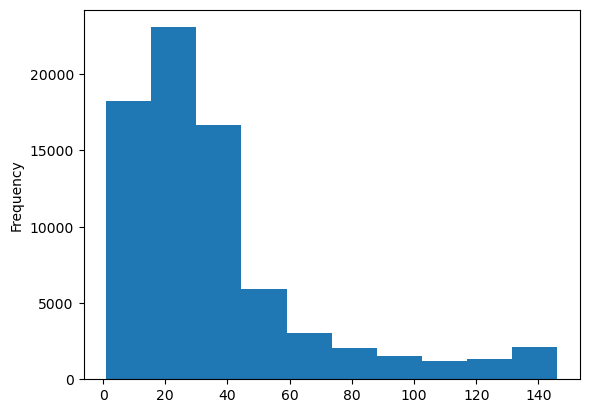

In [80]:
# len 시각화(label==0)
import matplotlib.pyplot as plt
df[df['label']==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

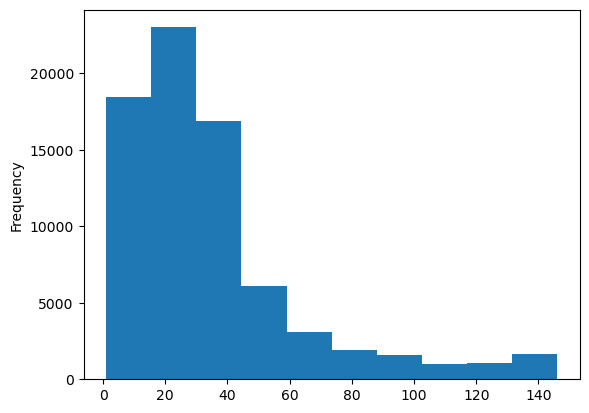

In [81]:
# len 시각화(label==1)
df[df['label']==1]['len'].plot(kind='hist')

In [82]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [83]:
# 토근화
vect = CountVectorizer(tokenizer=tokenizer.morphs) #형태소 분석된 것을 가지고 어휘사전을 만든다
vectors = vect.fit_transform(df['document'])

In [84]:
# 머신러닝 -> 교차검증(f1)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [85]:
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], cv=5, scoring='f1').mean()

0.6634352457852256

3. 자연어 전처리

- 어휘사전 구축

  -> 00% 이상 나타나는 단어 무시 (ex. 50% or 70%)

  -> 최소 N개의 문장에만 나타나는 단어만 유지(ex. 2 or 3)

- 불용어(stopwords) 제거

  -> 불용어: 문장의 의미를 분석하는 데 있어 큰 도움이 되지 않는 단어

  -> ex. 조사, 접미사, 접속사, 대명사 등

  -> 을, 는, 이, 가, 여기, 저기

- 띄어쓰기를 하는 방법

- 반복되는 글자 정리 (ex . ㅋㅋㅋ)하는 라이브러리 소개  (ex. soynlp)

- 맞춤법 검사 방법


In [88]:
#자연어 전처리
#어휘 사전 구축


# 토큰화(max_df) N개보다 큰 단어수 무시 (10개)
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2002)
cross_val_score(model, vectors, df['label'], cv=5, scoring='accuracy').mean()

0.658

In [89]:
# 토큰화(min_df) N개보다 작은 단어수 무시 (2개)
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2002)
cross_val_score(model, vectors, df['label'], cv=5, scoring='f1').mean()


0.6813583059174431

In [90]:
# 불용어 : 필요없는 단어 정리
# stopwords
text = '함께 탐방하며 성장하는 AI 학교 AIFFEL'
stop_words = ['하며', 'AI']
vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_


{'함께': 5, '탐방': 3, '성장하는': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [ ]:
# 텐서 플로우 설치
!pip install tensorflow

In [ ]:
# 띄어쓰기 자동
# spacing 설치
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git


In [91]:
# 띄어쓰기

from pykospacing import Spacing
spacing = Spacing()
text = '함께탐험하며성장하는AI학교AIFFEL'
spacing(text)


'함께 탐험하며 성장하는 AI 학교 AIFFEL'

반복되는 글자 정리

더 자세히 : https://github.com/lovit/soynlp

In [ ]:
# soynlp 설치
!pip install soynlp

In [92]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ호호호호호호호호호호', num_repeats=3)

'하하하ㅋㅋㅋ호호호'

맞춤법 검사

- 더 자세히 : https://github.com/ssut/py-hanspell

In [ ]:
# hanspell 설치
!pip install git+https://github.com/ssut/py-hanspell.git

In [93]:
# 맞춤법 검사
from hanspell import spell_checker
text = '맞춤법 틀리면외 않되?'

In [98]:
# 수정된 문장
result = spell_checker.check(text)

In [97]:
# 라이브러리에 없는 고유명사나 신조어는 다른 방법을 고려해야 한다.
result.checked

'맞춤법 틀리면 외 안돼?'

In [96]:
#종합퀴즈
# Q. 다음은 영화 리뷰 데이터를 전처리하고 머신러닝 모델을 돌리는 코드입니다.
# 아래 코드를 수정하여 토큰화(max_df) 10,15,20개보다 큰 단어 수 무시하기를 각각 설정하고,
# 바로 아래 코드 블럭의 모델을 돌려 결과 값을 비교해보세요.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import konlpy
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
# 결측치 삭제
df = df.dropna()
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
# 데이터 샘플링
df = df[:1000]
# 토큰화
tokenizer = Okt()
# 머신러닝 모델 작동 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# 토큰화(max_df) 10개보다 큰 단어 수 무시하기
vect_10 = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10)
vectors_10 = vect_10.fit_transform(df['document'])
# 토큰화(max_df) 15개보다 큰 단어 수 무시하기
vect_15 = CountVectorizer(tokenizer=tokenizer.morphs, max_df=15)
vectors_15 = vect_15.fit_transform(df['document'])
# 토큰화(max_df) 20개보다 큰 단어 수 무시하기
vect_20 = CountVectorizer(tokenizer=tokenizer.morphs, max_df=20)
vectors_20 = vect_20.fit_transform(df['document'])
# 모델 돌리기(10개)
model = RandomForestClassifier(random_state=2022)
cvs_10 = cross_val_score(model, vectors_10, df['label'], scoring='f1', cv=5).mean()
# 모델 돌리기(15개)
model = RandomForestClassifier(random_state=2022)
cvs_15 = cross_val_score(model, vectors_15, df['label'], scoring='f1', cv=5).mean()
# 모델 돌리기(20개)
model = RandomForestClassifier(random_state=2022)
cvs_20 = cross_val_score(model, vectors_20, df['label'], scoring='f1', cv=5).mean()

# Q. 결과값을 비교해 보세요.
print(f'10개보다 큰 단어 수 무시하기 : {cvs_10}\n'
      f'15개보다 큰 단어 수 무시하기 : {cvs_15}\n'
      f'20개보다 큰 단어 수 무시하기 : {cvs_20}')

10개보다 큰 단어 수 무시하기 : 0.6300776326538058
15개보다 큰 단어 수 무시하기 : 0.6397803806582216
20개보다 큰 단어 수 무시하기 : 0.6817517114020853
